<a href="https://colab.research.google.com/github/AjayAajhey/gvassn/blob/main/Ground_Cricket_Chirps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ground Cricket Chirps
In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


Error score of training dataset 0.6813394128565424
coffecient [[0.20119124]]
Intercept [0.60051489]
Error score of testing dataset 0.9265616592526871


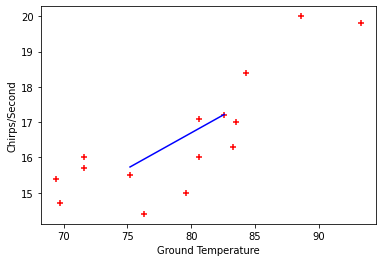

In [ ]:
# with splitting the data with training and testing
# Load the data
temp=df.drop("Chirps/Second", axis='columns')
chirps=df["Chirps/Second"]

# split the data for training and testing
temp_train,temp_test,chirps_train,chirps_test = train_test_split(temp,chirps,test_size=0.2,random_state=2)
#print(temp_train.shape,chirps_train.shape,temp_test.shape,chirps_test.shape)
xtrain=temp_train.values.reshape(-1,1)
ytrain=chirps_train.values.reshape(-1,1)
xtest=temp_test.values.reshape(-1,1)
ytest=chirps_test.values.reshape(-1,1)

# Model Fitting
lr=LinearRegression()
lr.fit(xtrain,ytrain)
Y_pred_train=lr.predict(xtrain)
#print(Y_pred_train)
er_scr=metrics.r2_score(ytrain,Y_pred_train)
print("Error score of training dataset", er_scr)
test_pred=lr.predict(xtest)

## 1.Find the linear regression equation for this data.
print("coffecient",lr.coef_)
print("Intercept",lr.intercept_)
Yeq=(xtest*lr.coef_)+lr.intercept_
#print(Yeq)


## 3.Find the equation's  𝑅2  
er_scr_test=metrics.r2_score(ytest,test_pred)
print("Error score of testing dataset",er_scr_test)

lr.diff = pd.DataFrame({'Actual value': ytest.flatten(), 'Predicted value': test_pred.flatten()})
#lr.diff.head()

## 2.Chart the original data and the equation on the chart.
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.scatter(temp,chirps,color="red",marker="+")
plt.plot(xtest,test_pred,color="blue")


In [ ]:
# Without splitting the data

# Load the data
X=df.drop("Chirps/Second", axis='columns')
Y=df["Chirps/Second"]

# Model Fitting
lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)


In [ ]:
## 1.Find the linear regression equation for this data.
lr.diff = pd.DataFrame({'Actual value': Y, 'Predicted value':Y_pred})
print(lr.diff.head())
print("coffecient",lr.coef_)
print("Intercept",lr.intercept_)
Yeq=(X*lr.coef_)+lr.intercept_


   Actual value  Predicted value
0          20.0        18.445091
1          16.0        14.994095
2          19.8        19.399190
3          18.4        17.572192
4          17.1        16.821093
coffecient [0.20299973]
Intercept 0.45931464523595267


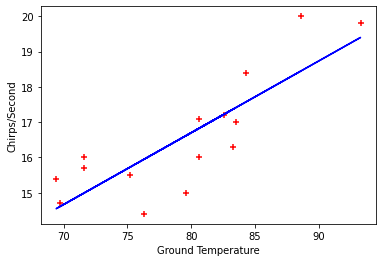

In [ ]:
# 2.Chart the original data and the equation on the chart.
plt.xlabel("Ground Temperature")
plt.ylabel("Chirps/Second")
plt.scatter(X,Y,color="red",marker="+")
plt.plot(X,Yeq,color="blue")


In [ ]:
# 3.Find the equation's  𝑅2  
er_scr=metrics.r2_score(Y,Y_pred)
print("Error score =", er_scr)


Error score = 0.6922946529146998


In [ ]:
## 4. Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
Yeq=(95*lr.coef_)+lr.intercept_
print(Yeq)


[19.74428913]


In [ ]:
# 5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?
xeq=18-lr.intercept_
xeq/lr.coef_


array([86.40743135])